# Billboard EDA

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

The purpose of this is to perform exploratory data analysis on the billboard hot 100 data. The hot 100 dataset was obtained from Sean Miller from dataworld (Source: https://data.world/kcmillersean/billboard-hot-100-1958-2017)

In [3]:
billboard = pd.read_csv('hot100.csv')
billboard

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...
325690,https://www.billboard.com/charts/hot-100/2018-...,3/17/2018,38,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,6.0
325691,https://www.billboard.com/charts/hot-100/2018-...,3/24/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,7.0
325692,https://www.billboard.com/charts/hot-100/2018-...,3/31/2018,36,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,34.0,28.0,8.0
325693,https://www.billboard.com/charts/hot-100/2018-...,4/7/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,36.0,28.0,9.0


## Data Cleaning

In [4]:
hot_100 = billboard.drop(columns  = ['url', 'SongID']) #drop unnecessary and repetitive columns
hot_100

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,6/1/1963,11,Still,Bill Anderson,1.0,17.0,11.0,8.0
1,1/7/1967,11,Coming Home Soldier,Bobby Vinton,1.0,17.0,11.0,8.0
2,7/3/1971,11,She's Not Just Another Woman,The 8th Day,1.0,17.0,11.0,8.0
3,11/29/1975,11,Saturday Night,Bay City Rollers,1.0,17.0,11.0,8.0
4,9/29/1979,11,Pop Muzik,M,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...
325690,3/17/2018,38,You Make It Easy,Jason Aldean,1.0,38.0,28.0,6.0
325691,3/24/2018,34,You Make It Easy,Jason Aldean,1.0,38.0,28.0,7.0
325692,3/31/2018,36,You Make It Easy,Jason Aldean,1.0,34.0,28.0,8.0
325693,4/7/2018,34,You Make It Easy,Jason Aldean,1.0,36.0,28.0,9.0


In [5]:
split_col = hot_100['WeekID'].str.split('/', expand = True) #split the dates and create columns for the month, day and year
split_col
rename_col = split_col.rename(columns = {0: 'Month', 1:'Day', 2:'Year'}) #rename the columns
rename_col

,Month,Day,Year
0,6,1,1963
1,1,7,1967
2,7,3,1971
3,11,29,1975
4,9,29,1979
...,...,...,...
325690,3,17,2018
325691,3,24,2018
325692,3,31,2018
325693,4,7,2018


In [6]:
hot_100['Month'] = rename_col['Month'] #Include columns in original dataframe
hot_100['Day'] = rename_col['Day']
hot_100['Year'] = rename_col['Year']
hot_100

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,6/1/1963,11,Still,Bill Anderson,1.0,17.0,11.0,8.0,6,1,1963
1,1/7/1967,11,Coming Home Soldier,Bobby Vinton,1.0,17.0,11.0,8.0,1,7,1967
2,7/3/1971,11,She's Not Just Another Woman,The 8th Day,1.0,17.0,11.0,8.0,7,3,1971
3,11/29/1975,11,Saturday Night,Bay City Rollers,1.0,17.0,11.0,8.0,11,29,1975
4,9/29/1979,11,Pop Muzik,M,1.0,17.0,11.0,8.0,9,29,1979
...,...,...,...,...,...,...,...,...,...,...,...
325690,3/17/2018,38,You Make It Easy,Jason Aldean,1.0,38.0,28.0,6.0,3,17,2018
325691,3/24/2018,34,You Make It Easy,Jason Aldean,1.0,38.0,28.0,7.0,3,24,2018
325692,3/31/2018,36,You Make It Easy,Jason Aldean,1.0,34.0,28.0,8.0,3,31,2018
325693,4/7/2018,34,You Make It Easy,Jason Aldean,1.0,36.0,28.0,9.0,4,7,2018


In [7]:
hot_100_data = hot_100.astype({'Year': 'int32', 'Month': 'int32', 'Day': 'int32'}) #convert number strings to integers
hot_100_data

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,6/1/1963,11,Still,Bill Anderson,1.0,17.0,11.0,8.0,6,1,1963
1,1/7/1967,11,Coming Home Soldier,Bobby Vinton,1.0,17.0,11.0,8.0,1,7,1967
2,7/3/1971,11,She's Not Just Another Woman,The 8th Day,1.0,17.0,11.0,8.0,7,3,1971
3,11/29/1975,11,Saturday Night,Bay City Rollers,1.0,17.0,11.0,8.0,11,29,1975
4,9/29/1979,11,Pop Muzik,M,1.0,17.0,11.0,8.0,9,29,1979
...,...,...,...,...,...,...,...,...,...,...,...
325690,3/17/2018,38,You Make It Easy,Jason Aldean,1.0,38.0,28.0,6.0,3,17,2018
325691,3/24/2018,34,You Make It Easy,Jason Aldean,1.0,38.0,28.0,7.0,3,24,2018
325692,3/31/2018,36,You Make It Easy,Jason Aldean,1.0,34.0,28.0,8.0,3,31,2018
325693,4/7/2018,34,You Make It Easy,Jason Aldean,1.0,36.0,28.0,9.0,4,7,2018


## Exploratory Data Analysis

## The 60s

Artists from the sixties with the most charted songs on the Billboard Hot 100.

In [8]:
sixties = hot_100_data[(hot_100_data['Year'] > 1959) & (hot_100_data['Year'] < 1970)]
sixties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,6/1/1963,11,Still,Bill Anderson,1.0,17.0,11.0,8.0,6,1,1963
1,1/7/1967,11,Coming Home Soldier,Bobby Vinton,1.0,17.0,11.0,8.0,1,7,1967
8,8/18/1962,11,Party Lights,Claudine Clark,1.0,18.0,11.0,8.0,8,18,1962
23,7/30/1966,12,Paperback Writer,The Beatles,1.0,6.0,1.0,8.0,7,30,1966
24,4/15/1967,12,Penny Lane,The Beatles,1.0,6.0,1.0,8.0,4,15,1967
...,...,...,...,...,...,...,...,...,...,...,...
325654,11/9/1963,22,You Lost The Sweetest Boy,Mary Wells,1.0,24.0,22.0,7.0,11,9,1963
325655,11/16/1963,24,You Lost The Sweetest Boy,Mary Wells,1.0,22.0,22.0,8.0,11,16,1963
325656,11/23/1963,36,You Lost The Sweetest Boy,Mary Wells,1.0,24.0,22.0,9.0,11,23,1963
325657,8/2/1969,96,You Made A Believer (Out Of Me),Ruby Andrews,1.0,NaN,96.0,1.0,8,2,1969


In [9]:
artist_count_60s =sixties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_60s = artist_count_60s.rename(columns = {'Song': 'Count'})
top_five = artist_counts_60s.sort_values(by = 'Count', ascending = False).head(5)
top_five

,Performer,Count
1361,The Beatles,478
205,Brenda Lee,410
452,Elvis Presley With The Jordanaires,394
299,Connie Francis,373
1360,The Beach Boys,340


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'The Beatles'),
  Text(1, 0, 'Brenda Lee'),
  Text(2, 0, 'Elvis Presley With The Jordanaires'),
  Text(3, 0, 'Connie Francis'),
  Text(4, 0, 'The Beach Boys')])

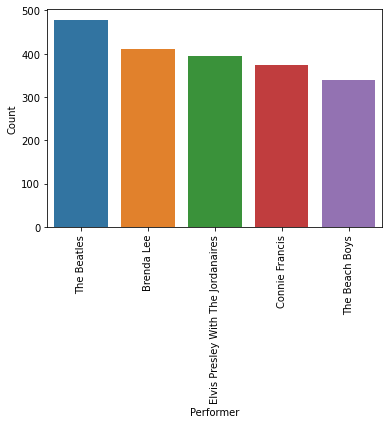

In [10]:
sns.barplot(x='Performer',y='Count',data= top_five)
plt.xticks(rotation= 90)


## 70s

Artists from the seventies with the most charted songs on the Billboard Hot 100.

In [12]:
seventies = hot_100_data[(hot_100_data['Year'] > 1969) & (hot_100_data['Year'] < 1980)]
seventies

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
2,7/3/1971,11,She's Not Just Another Woman,The 8th Day,1.0,17.0,11.0,8.0,7,3,1971
3,11/29/1975,11,Saturday Night,Bay City Rollers,1.0,17.0,11.0,8.0,11,29,1975
4,9/29/1979,11,Pop Muzik,M,1.0,17.0,11.0,8.0,9,29,1979
9,9/12/1970,11,Candida,Dawn,1.0,18.0,11.0,8.0,9,12,1970
19,10/28/1978,11,Beast Of Burden,The Rolling Stones,1.0,22.0,11.0,8.0,10,28,1978
...,...,...,...,...,...,...,...,...,...,...,...
325671,8/27/1977,33,You Made Me Believe In Magic,Bay City Rollers,1.0,10.0,10.0,13.0,8,27,1977
325672,9/3/1977,33,You Made Me Believe In Magic,Bay City Rollers,1.0,33.0,10.0,14.0,9,3,1977
325673,9/10/1977,39,You Made Me Believe In Magic,Bay City Rollers,1.0,33.0,10.0,15.0,9,10,1977
325674,9/17/1977,55,You Made Me Believe In Magic,Bay City Rollers,1.0,39.0,10.0,16.0,9,17,1977


In [13]:
artist_count_70s =seventies[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_70s = artist_count_70s.rename(columns = {'Song': 'Count'})
top_five_70s = artist_counts_70s.sort_values(by = 'Count', ascending = False).head(5)
top_five_70s

,Performer,Count
105,Bee Gees,333
303,Chicago,310
523,Elton John,297
265,Carpenters,295
527,Elvis Presley,269


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bee Gees'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'Elton John'),
  Text(3, 0, 'Carpenters'),
  Text(4, 0, 'Elvis Presley')])

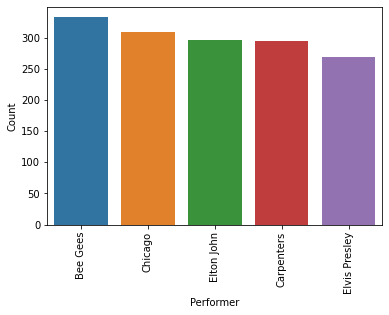

In [14]:
sns.barplot(x='Performer',y='Count',data= top_five_70s)
plt.xticks(rotation= 90)


# 80s

Artists from the eighties with the most charted songs on the Billboard Hot 100.

In [66]:
eighties = hot_100_data[(hot_100_data['Year'] > 1979) & (hot_100_data['Year'] < 1990)]
eighties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
5,9/19/1987,11,Carrie,Europe,1.0,17.0,11.0,8.0,9,19,1987
6,10/3/1987,11,Casanova,Levert,1.0,17.0,11.0,8.0,10,3,1987
10,3/16/1985,11,Only The Young,Journey,1.0,18.0,11.0,8.0,3,16,1985
11,8/10/1985,11,St. Elmo's Fire (Man In Motion),John Parr,1.0,18.0,11.0,8.0,8,10,1985
12,5/31/1986,11,Crush On You,The Jets,1.0,18.0,11.0,8.0,5,31,1986
...,...,...,...,...,...,...,...,...,...,...,...
325643,9/14/1985,77,You Look Marvelous,Billy Crystal,1.0,72.0,58.0,8.0,9,14,1985
325644,9/21/1985,77,You Look Marvelous,Billy Crystal,1.0,77.0,58.0,9.0,9,21,1985
325645,9/28/1985,88,You Look Marvelous,Billy Crystal,1.0,77.0,58.0,10.0,9,28,1985
325646,10/5/1985,91,You Look Marvelous,Billy Crystal,1.0,88.0,58.0,11.0,10,5,1985


In [70]:
artist_count_80s = eighties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_80s = artist_count_80s.rename(columns = {'Song': 'Count'})
top_five_80s = artist_counts_80s.sort_values(by = 'Count', ascending = False).head(5)
top_five_80s

,Performer,Count
277,Daryl Hall John Oates,363
810,Madonna,333
126,Billy Joel,330
725,Kool & The Gang,315
380,Elton John,298


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Daryl Hall John Oates'),
  Text(1, 0, 'Madonna'),
  Text(2, 0, 'Billy Joel'),
  Text(3, 0, 'Kool & The Gang'),
  Text(4, 0, 'Elton John')])

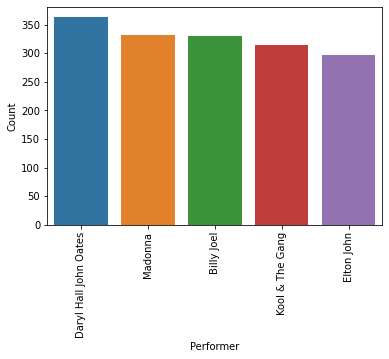

In [68]:
sns.barplot(x='Performer',y='Count',data= top_five_80s)
plt.xticks(rotation= 90)

## 90s

Artists from the nineties with the most charted songs on the Billboard Hot 100.

In [69]:
nineties = hot_100_data[(hot_100_data['Year'] > 1989) & (hot_100_data['Year'] < 2000)]
nineties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
7,3/30/1996,11,"All The Things (Your Man Won't Do) (From ""Don'...",Joe,1.0,17.0,11.0,8.0,3,30,1996
16,3/27/1999,11,All Night Long,Faith Evans Featuring Puff Daddy,1.0,19.0,11.0,8.0,3,27,1999
31,1/31/1998,12,A Song For Mama,Boyz II Men,1.0,12.0,8.0,8.0,1,31,1998
33,4/27/1996,12,Doin It,LL Cool J,1.0,12.0,9.0,8.0,4,27,1996
46,8/23/1997,12,"C U When U Get There (From ""Nothing To Lose"")",Coolio Featuring 40 Thevz,1.0,12.0,12.0,8.0,8,23,1997
...,...,...,...,...,...,...,...,...,...,...,...
325564,12/27/1997,59,You Light Up My Life,LeAnn Rimes,1.0,59.0,34.0,16.0,12,27,1997
325565,1/3/1998,51,You Light Up My Life,LeAnn Rimes,1.0,59.0,34.0,17.0,1,3,1998
325566,1/10/1998,48,You Light Up My Life,LeAnn Rimes,1.0,51.0,34.0,18.0,1,10,1998
325567,1/17/1998,64,You Light Up My Life,LeAnn Rimes,1.0,48.0,34.0,19.0,1,17,1998


In [72]:
artist_count_90s = nineties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_90s = artist_count_90s.rename(columns = {'Song': 'Count'})
top_five_90s = artist_counts_90s.sort_values(by = 'Count', ascending = False).head(5)
top_five_90s

,Performer,Count
929,Madonna,407
939,Mariah Carey,386
205,Boyz II Men,327
1435,TLC,286
1679,Whitney Houston,285


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Madonna'),
  Text(1, 0, 'Mariah Carey'),
  Text(2, 0, 'Boyz II Men'),
  Text(3, 0, 'TLC'),
  Text(4, 0, 'Whitney Houston')])

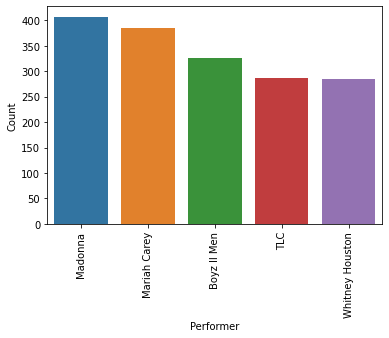

In [73]:
sns.barplot(x='Performer',y='Count',data= top_five_90s)
plt.xticks(rotation= 90)

## 2000s

Artists from the 2000s with the most charted songs on the Billboard Hot 100.

In [75]:
two_thousands = hot_100_data[(hot_100_data['Year'] > 1999) & (hot_100_data['Year'] < 2010) ]
two_thousands

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
22,10/15/2005,11,Run It!,Chris Brown,1.0,24.0,11.0,8.0,10,15,2005
36,10/21/2006,12,Call Me When You're Sober,Evanescence,1.0,12.0,10.0,8.0,10,21,2006
37,12/10/2005,12,Don't Forget About Us,Mariah Carey,1.0,11.0,11.0,8.0,12,10,2005
47,8/16/2003,12,Shake Ya Tailfeather,"Nelly, P. Diddy & Murphy Lee",1.0,12.0,12.0,8.0,8,16,2003
48,9/20/2003,12,Can't Hold Us Down,Christina Aguilera Featuring Lil' Kim,1.0,12.0,12.0,8.0,9,20,2003
...,...,...,...,...,...,...,...,...,...,...,...
325603,9/27/2008,65,You Look Good In My Shirt,Keith Urban,1.0,56.0,44.0,13.0,9,27,2008
325604,10/4/2008,79,You Look Good In My Shirt,Keith Urban,1.0,65.0,44.0,14.0,10,4,2008
325605,10/11/2008,88,You Look Good In My Shirt,Keith Urban,1.0,79.0,44.0,15.0,10,11,2008
325606,10/18/2008,98,You Look Good In My Shirt,Keith Urban,1.0,88.0,44.0,16.0,10,18,2008


In [76]:
artist_count_2000s = two_thousands[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_2000s = artist_count_2000s.rename(columns = {'Song': 'Count'})
top_five_2000s = artist_counts_2000s.sort_values(by = 'Count', ascending = False).head(5)
top_five_2000s

,Performer,Count
1276,Rascal Flatts,454
1561,Toby Keith,433
836,Kenny Chesney,413
1550,Tim McGraw,404
823,Keith Urban,381


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Rascal Flatts'),
  Text(1, 0, 'Toby Keith'),
  Text(2, 0, 'Kenny Chesney'),
  Text(3, 0, 'Tim McGraw'),
  Text(4, 0, 'Keith Urban')])

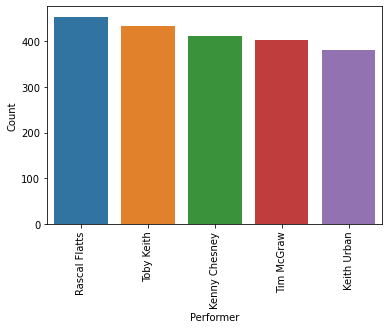

In [77]:
sns.barplot(x='Performer',y='Count',data= top_five_2000s)
plt.xticks(rotation= 90)

# 2010s

Artists from the 2010s with the most charted songs on the Billboard Hot 100.

In [78]:
twenty_tens = hot_100_data[(hot_100_data['Year'] > 2009) & (hot_100_data['Year'] < 2020) ]
twenty_tens

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
17,12/7/2019,11,Dance Monkey,Tones And I,1.0,19.0,11.0,8.0,12,7,2019
27,3/27/2010,12,Baby,Justin Bieber Featuring Ludacris,1.0,14.0,5.0,8.0,3,27,2010
28,4/7/2018,12,Pray For Me,The Weeknd & Kendrick Lamar,1.0,10.0,7.0,8.0,4,7,2018
34,9/8/2012,12,Blow Me (One Last Kiss),P!nk,1.0,12.0,9.0,8.0,9,8,2012
51,9/16/2017,12,Bank Account,21 Savage,1.0,12.0,12.0,8.0,9,16,2017
...,...,...,...,...,...,...,...,...,...,...,...
325690,3/17/2018,38,You Make It Easy,Jason Aldean,1.0,38.0,28.0,6.0,3,17,2018
325691,3/24/2018,34,You Make It Easy,Jason Aldean,1.0,38.0,28.0,7.0,3,24,2018
325692,3/31/2018,36,You Make It Easy,Jason Aldean,1.0,34.0,28.0,8.0,3,31,2018
325693,4/7/2018,34,You Make It Easy,Jason Aldean,1.0,36.0,28.0,9.0,4,7,2018


In [79]:
artist_count_2010s = twenty_tens[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_2010s = artist_count_2010s.rename(columns = {'Song': 'Count'})
top_five_2010s = artist_counts_2010s.sort_values(by = 'Count', ascending = False).head(5)
top_five_2010s

,Performer,Count
561,Drake,683
1920,Taylor Swift,630
1310,Luke Bryan,433
862,Imagine Dragons,407
910,Jason Aldean,387


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Taylor Swift'),
  Text(2, 0, 'Luke Bryan'),
  Text(3, 0, 'Imagine Dragons'),
  Text(4, 0, 'Jason Aldean')])

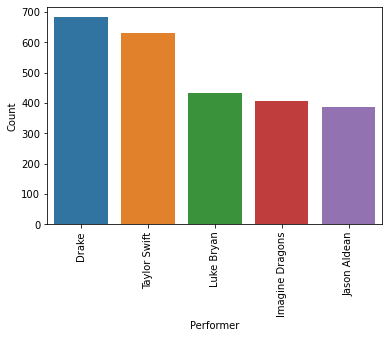

In [83]:
sns.barplot(x='Performer',y='Count',data= top_five_2010s)
plt.xticks(rotation= 90)

## 2020s

Artists from the 2020s with the most charted songs on the Billboard Hot 100.

In [81]:
twenties = hot_100_data[(hot_100_data['Year'] == 2020)]
twenties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
309345,12/26/2020,1,Willow,Taylor Swift,NaN,NaN,NaN,NaN,12,26,2020
309346,12/26/2020,2,All I Want For Christmas Is You,Mariah Carey,NaN,NaN,NaN,NaN,12,26,2020
309347,12/26/2020,3,Rockin' Around The Christmas Tree,Brenda Lee,NaN,NaN,NaN,NaN,12,26,2020
309348,12/26/2020,4,Jingle Bell Rock,Bobby Helms,NaN,NaN,NaN,NaN,12,26,2020
309349,12/26/2020,5,Mood,24kGoldn Featuring iann dior,NaN,NaN,NaN,NaN,12,26,2020
...,...,...,...,...,...,...,...,...,...,...,...
314540,1/4/2020,96,Candy,Doja Cat,NaN,NaN,NaN,NaN,1,4,2020
314541,1/4/2020,97,BEST ON EARTH,Russ & BIA,NaN,NaN,NaN,NaN,1,4,2020
314542,1/4/2020,98,Tusa,Karol G & Nicki Minaj,NaN,NaN,NaN,NaN,1,4,2020
314543,1/4/2020,99,Enemies,Post Malone Featuring DaBaby,NaN,NaN,NaN,NaN,1,4,2020


In [82]:
artist_count_2020s = twenties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_2020s = artist_count_2020s.rename(columns = {'Song': 'Count'})
top_five_2020s = artist_counts_2020s.sort_values(by = 'Count', ascending = False).head(5)
top_five_2020s

,Performer,Count
423,The Weeknd,104
253,Lil Baby,99
167,Harry Styles,88
330,Morgan Wallen,86
124,Dua Lipa,79


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'The Weeknd'),
  Text(1, 0, 'Lil Baby'),
  Text(2, 0, 'Harry Styles'),
  Text(3, 0, 'Morgan Wallen'),
  Text(4, 0, 'Dua Lipa')])

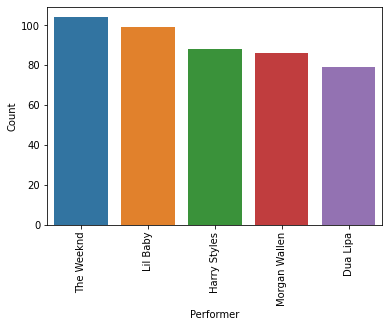

In [84]:
sns.barplot(x='Performer',y='Count',data= top_five_2020s)
plt.xticks(rotation= 90)

## Artist with the most number one hits on the Billboard Hot 100

In [100]:
number_ones = hot_100[hot_100['Week Position'] == 1]
one_hits = number_ones[['Performer', 'Week Position', 'Song']].groupby(['Performer','Week Position'], as_index = False).count()
top_one_hit_artists = one_hits.rename(columns = {'Song': 'Count'})
top_five_artists = top_one_hit_artists.sort_values(by = 'Count', ascending = False).head(5)
top_five_artists

,Performer,Week Position,Count
383,Mariah Carey,1,64
609,The Beatles,1,54
94,Boyz II Men,1,34
380,Madonna,1,32
720,Whitney Houston,1,31


## Most charted song on the billboard hot 100

In [101]:
charted_songs = hot_100[['Performer', 'Week Position', 'Song']].groupby(['Performer', 'Song'], as_index = False).count()
top_songs = charted_songs.rename(columns = {'Week Position': 'Count'})
top_five_songs = top_songs.sort_values(by = 'Count', ascending = False).head(5)
top_five_songs

,Performer,Song,Count
11126,Imagine Dragons,Radioactive,87
400,AWOLNATION,Sail,79
11941,Jason Mraz,I'm Yours,76
14901,LeAnn Rimes,How Do I Live,69
18585,OneRepublic,Counting Stars,68


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Imagine Dragons'),
  Text(1, 0, 'AWOLNATION'),
  Text(2, 0, 'Jason Mraz'),
  Text(3, 0, 'LeAnn Rimes'),
  Text(4, 0, 'OneRepublic')])

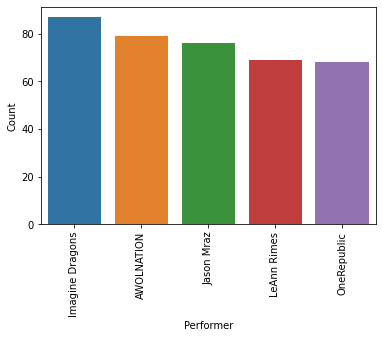

In [102]:
sns.barplot(x='Performer',y='Count',data= top_five_songs)
plt.xticks(rotation= 90)

# Does having featured artists in songs correlate to ranking success?

In [104]:
hot_100['Features'] = (hot_100['Performer'].str.contains('&')) | (hot_100['Performer'].str.contains('Featuring')) | (hot_100['Performer'].str.contains('featuring'))
no_features = hot_100[hot_100['Features'] == False]
group_songs = no_features[['Song', 'Week Position']].groupby(['Song'], as_index = False).mean('Position')
top_songs = group_songs.rename(columns = {'Week Position': 'Average Position (No Features)'})
top_songs

,Song,Average Position (No Features)
0,"""B"" Girls",71.000000
1,"""Cherry Cherry"" from Hot August Night",47.900000
2,"""Joy"" Pt. I",42.222222
3,"""Roots"" Medley",70.571429
4,"""Yep!""",56.333333
...,...,...
21024,teachme,60.750000
21025,whoa (mind in awe),70.666667
21026,whoknows,84.461538
21027,www.memory,63.400000


In [105]:
features = hot_100[hot_100['Features'] == True]
group_songs = features[['Song', 'Week Position']].groupby(['Song'], as_index = False).mean('Position')
top_songs_f = group_songs.rename(columns = {'Week Position': 'Average Position (Features)'})
top_songs_f

bigdata = pd.concat([top_songs, top_songs_f], ignore_index=True, sort=False)
bigdata

,Song,Average Position (No Features),Average Position (Features)
0,"""B"" Girls",71.000000,NaN
1,"""Cherry Cherry"" from Hot August Night",47.900000,NaN
2,"""Joy"" Pt. I",42.222222,NaN
3,"""Roots"" Medley",70.571429,NaN
4,"""Yep!""",56.333333,NaN
...,...,...,...
24991,g n f (Give No Fxk),NaN,48.000000
24992,iPHONE,NaN,43.000000
24993,iSpy,NaN,23.266667
24994,ily,NaN,61.392857


<AxesSubplot:>

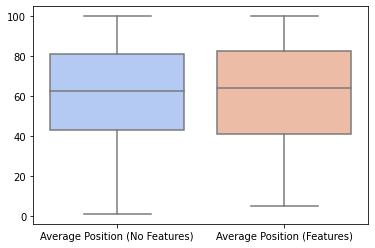

In [106]:
sns.boxplot(data = bigdata, palette="coolwarm", order=['Average Position (No Features)', 'Average Position (Features)'])

## Do certain words in songs determine ranking success?

In [107]:
split_songs = (hot_100['Song'].str.split(" "))
data = pd.DataFrame({'Words': split_songs, 'nums': range(len(split_songs))})
words_songs = data.apply(lambda x: pd.Series(x['Words']),axis=1).stack().reset_index(level=1, drop=True)
data_2 = pd.DataFrame({'Words': words_songs, 'nums': range(len(words_songs))})
word_groups = data_2.groupby(['Words'], as_index = False).count()
most_common_words = word_groups.sort_values(by = 'nums', ascending = False).head(10)
most_common_words

,Words,nums
10289,The,39354
11584,You,33713
5527,I,25095
6513,Love,23840
6828,Me,20854
1134,A,17543
10470,To,16686
7525,Of,14604
7223,My,14574
5609,In,13541


In [109]:
contain_pop_words = hot_100.loc[hot_100['Song'].isin(most_common_words['Words'])]

words_ranks = contain_pop_words[['Song', 'Week Position']].groupby(['Song'], as_index = False).mean('Position')
words_ranks
word_rank = words_ranks.rename(columns = {'Week Position': 'Average Position'})
word_rank

,Song,Average Position
0,I,62.250000
1,Love,43.769231
2,You,58.641304


<AxesSubplot:xlabel='Song', ylabel='Average Position'>

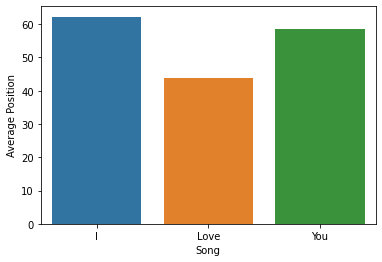

In [112]:
sns.barplot(x = 'Song', y = 'Average Position', data = word_rank)